In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.drop(['CustomerId', 'RowNumber', 'Surname'],axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
def unique_col_values(df):
    for col in df:
        if (df[col].dtypes == object):
            print(f'{col}: {df[col].unique()}')
unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [6]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [7]:
df['Gender'].replace({"Female":1, "Male":0}, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [8]:
true_false_cols = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
for col in true_false_cols:
    df[col] = df[col].astype(int)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,2,0.500246,1,1,1,0.395400,0,0,0,1


In [10]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [11]:
X = df.drop('Exited', axis=1)
y = df.Exited

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=10)
len(X_train)

8500

In [13]:
from tensorflow import keras

In [14]:
X_train.shape

(8500, 12)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
266/266 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7642
Epoch 2/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7995
Epoch 3/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.8019
Epoch 4/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8045
Epoch 5/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8066
Epoch 6/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8099
Epoch 7/100
266/266 [==============================] - 1s 2ms/step - loss: 0.4276 - accuracy: 0.8140
Epoch 8/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8187
Epoch 9/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4106 - accuracy: 0.8209
Epoch 10/100
266/266 [==============================] - 0s 2ms/step - loss: 0.4027 - accura

In [16]:
y_predicted = model.predict(X_test)
y_predicted

47/47 [==============================] - 0s 1ms/step


array([[0.5715452 ],
       [0.52777964],
       [0.65910053],
       ...,
       [0.05066111],
       [0.15525135],
       [0.08375754]], dtype=float32)

In [17]:
y_pred = []
for i in y_predicted:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0) 
        
y_pred[:5]

[1, 1, 1, 0, 1]

In [18]:
y_test[:5]

937     0
9355    0
2293    1
192     0
8675    0
Name: Exited, dtype: int64

In [19]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8367


[0.3781715929508209, 0.8366666436195374]

In [20]:
import tensorflow as tf

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1120,   49],
       [ 196,  135]], dtype=int32)>

<Axes: >

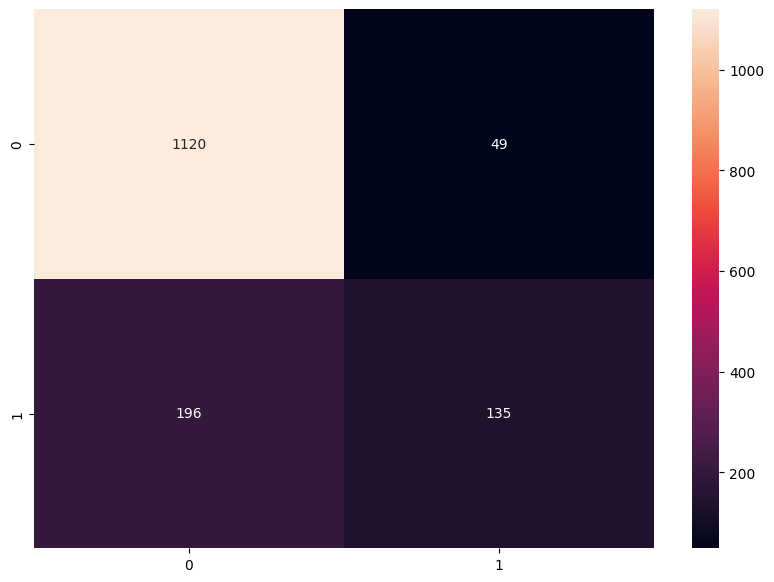

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='d')
